CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PIRATIO     0
B           0
LSTAT       0
MEDV       54
dtype: int64
重复行数： 0
<class 'pandas.core.frame.DataFrame'>
Index: 452 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     452 non-null    float64
 1   ZN       452 non-null    float64
 2   INDUS    452 non-null    float64
 3   CHAS     452 non-null    float64
 4   NOX      452 non-null    float64
 5   RM       452 non-null    float64
 6   AGE      452 non-null    float64
 7   DIS      452 non-null    float64
 8   RAD      452 non-null    int64  
 9   TAX      452 non-null    float64
 10  PIRATIO  452 non-null    float64
 11  B        452 non-null    float64
 12  LSTAT    452 non-null    float64
 13  MEDV     452 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 53.0 KB
None
             CRIM 

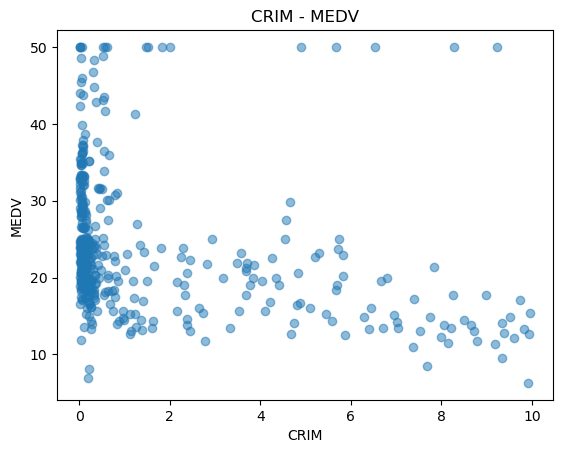

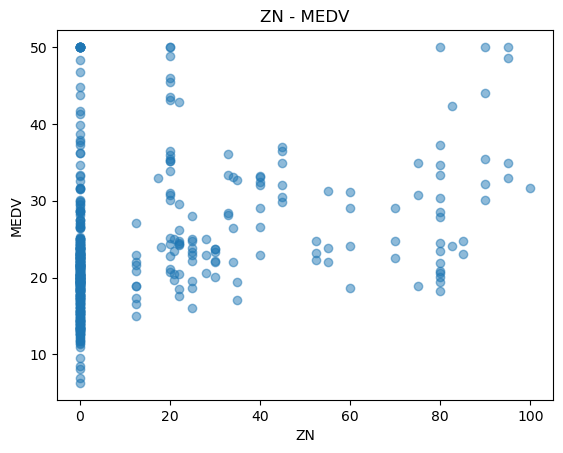

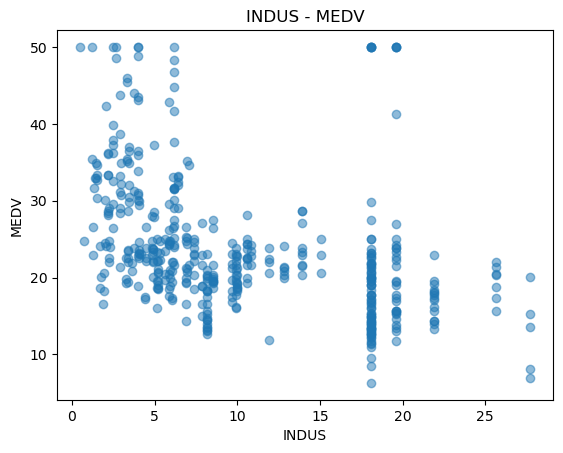

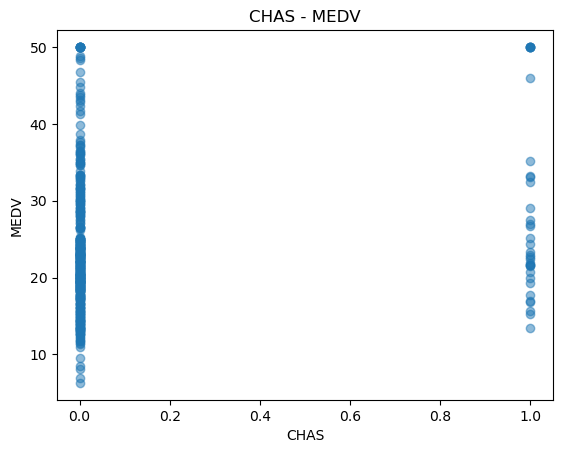

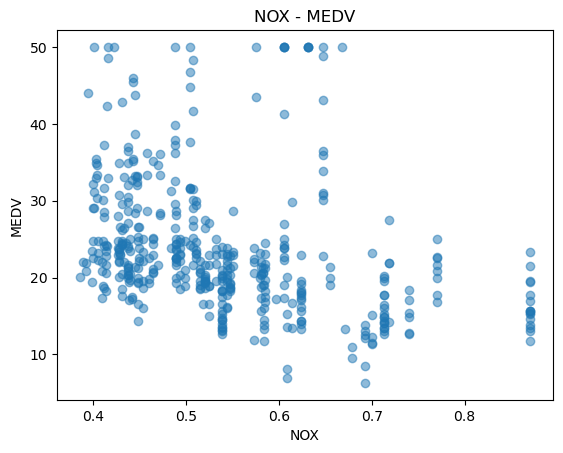

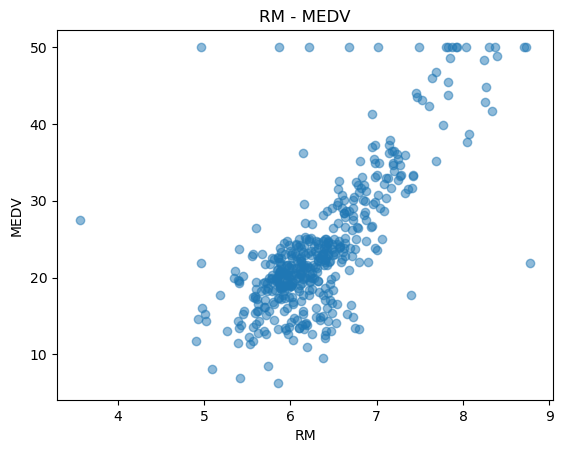

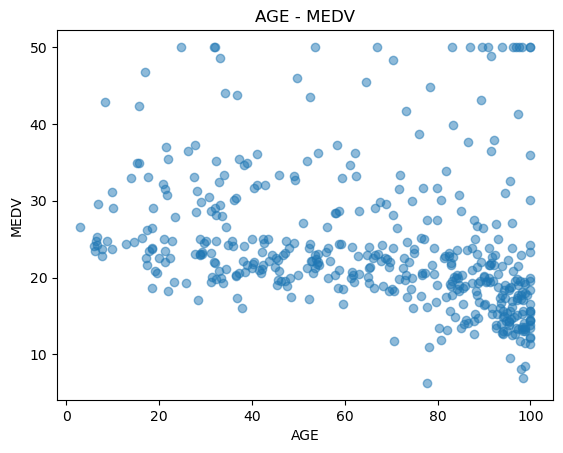

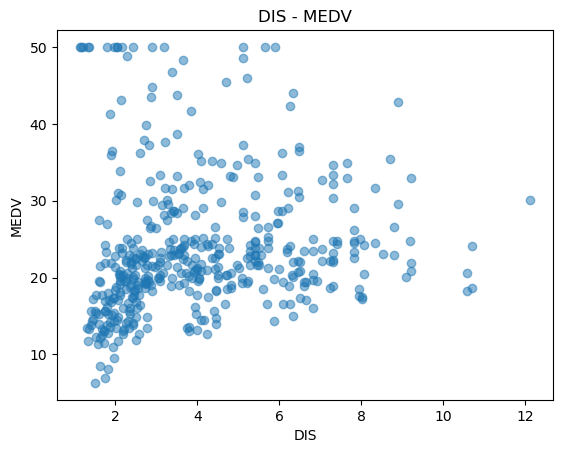

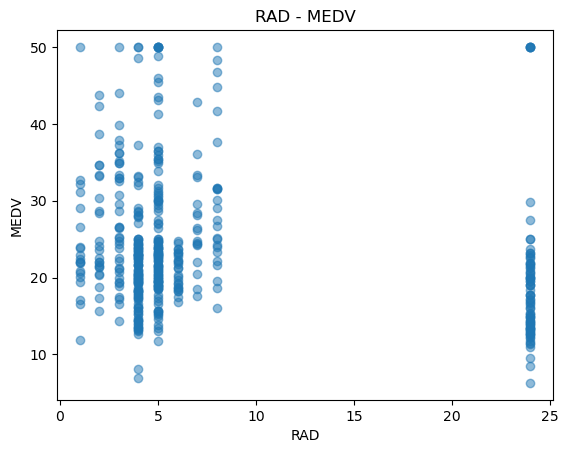

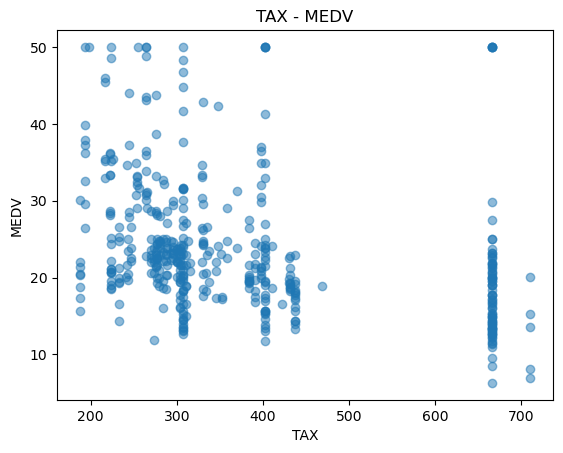

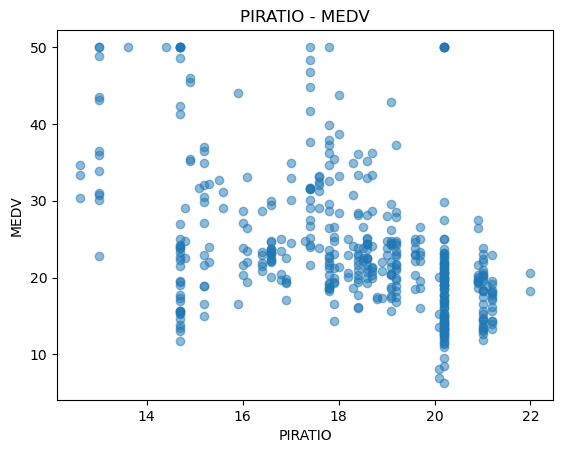

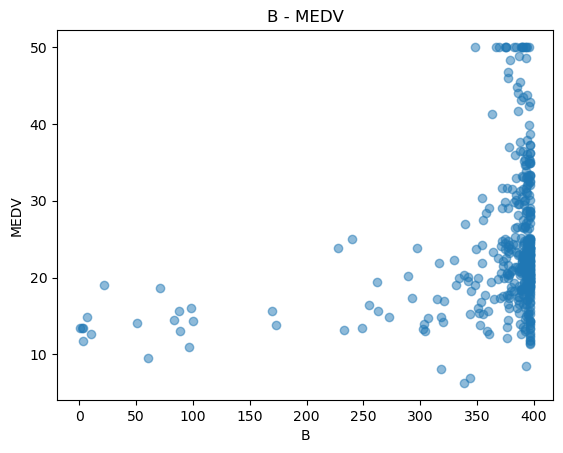

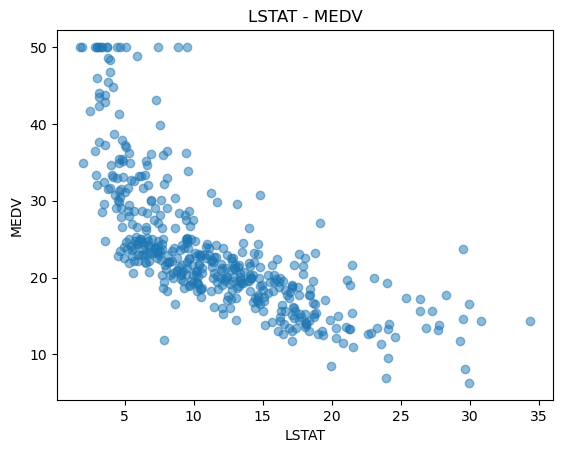

最小二乘法均方误差: 19.580914036245478
梯度下降法均方误差: 20.45200190194803


In [32]:
#导包：
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#读取波士顿房价数据集：
data=pd.read_csv('boston_housing_data.csv')
head=data.head()

#数据清洗
#检查缺失值：
print(data.isnull().sum())
#将缺失值所在行直接删除：
data.dropna(inplace=True)
#删除重复数据：
print("重复行数：", data.duplicated().sum())
data.drop_duplicates(inplace=True)

# # 处理异常值，这里假设将房价列中大于100的异常值去除
# data = data[data['MEDV'] <= 100]

#数据探索
#查看数据集信息：
print(data.info())
#查看数据集统计信息：
print(data.describe())

#可视化分析（散点图）
#绘制各个变量与因变量（房价）的散点图：
features=data.columns[:-1]  #获取除最后一列（房价）之外的所有列
Houseprices=data.columns[-1]  #获取最后一列（房价）
for feature in features:
    plt.scatter(data[feature], data[Houseprices], alpha=0.5)  #设置横纵坐标，并设置点的透明度为0.5
    plt.xlabel(feature)  #设置横坐标名称
    plt.ylabel(Houseprices)  #设置纵坐标名称
    plt.title(f'{feature} - {Houseprices}')  #设置图表的标题
    plt.show()

#自定义线性回归模型：
class LinearRegression:
    def __init__(self,lr=0.01,n_iters=1000):  #初始化模型参数
        self.lr=lr  #学习率
        self.n_iters=n_iters   #迭代次数
        self.weights=None  #权重
        self.bias=None  #偏差
    
    def fit(self,X,y):  #训练线性回归模型
        n_samples,n_features=X.shape
        self.weights=np.zeros(n_features)  #获取样本数量和特征数量
        self.bias=0
        
        #梯度下降
        for _ in range(self.n_iters):   # “_”标示只读取
            y_pred=np.dot(X, self.weights) + self.bias  #计算预测值
            dw=(1/n_samples)*np.dot(X.T,(y_pred-y))  #计算权重
            db=(1 / n_samples)*np.sum(y_pred-y)  #计算偏差梯度
            self.weights-=self.lr*dw
            self.bias-=self.lr*db
    
    def predict(self,X):
        return np.dot(X,self.weights)+self.bias

#数据加载（预处理）
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

#划分训练集和测试集：为了正确评估模型性能，将数据划分为训练集和测试集，并在训练集上训练模型，在测试集上验证模型性能。
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=32)
#将20%的数据分配给测试集，剩余的80%分配给训练集

#标准化数据：帮助模型更快地收敛并且通常能提高模型的性能
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()  #对数据进行标准化处理
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

#调用函数
linreg_ls=LinearRegression()  #用最小二乘法训练
linreg_ls.fit(X_train_scaled,y_train)
linreg_gd=LinearRegression(lr=0.01,n_iters=10000)  #用梯度下降法训练
linreg_gd.fit(X_train_scaled,y_train)

y_pred_ls=linreg_ls.predict(X_test_scaled)  #预测结果
y_pred_gd=linreg_gd.predict(X_test_scaled)

#计算均方误差
from sklearn.metrics import mean_squared_error
mse_ls=mean_squared_error(y_test,y_pred_ls)
mse_gd=mean_squared_error(y_test,y_pred_gd)
print('最小二乘法均方误差:', mse_ls)
print('梯度下降法均方误差:', mse_gd)